In [0]:
import csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#Advanced optimization
from scipy import optimize as op
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import files
uploaded = files.upload()

Saving owls.csv to owls.csv


In [4]:
owls = pd.read_csv("owls.csv",header=None)
#Number of examples
m = owls.shape[0]
#Features
n = (len(owls.columns)- 1)

X = np.ones((m,n ))
y = np.array((m,1))
for i in range(len(owls.columns)- 1):
  X[:,i] = owls.iloc[:,i]
y = owls.iloc[: , -1]

#Number of classes
k = len(np.unique(y))
print(k)
def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X
X = normalize(X)
# Add bias dimension and transform into columns
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))


3


In [0]:
#Logistic Regression

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Cost function
def costFunction(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) 

#Regularized gradient function
def gradient(theta, X, y,):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    

    return ((1 / m) * X.T.dot(h - y))

#Optimal theta 
def logisticRegression(X, y, theta , alpha):
    #result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),method = 'TNC', jac = regGradient)
    for i in range(1000):
            finaGradient = gradient(theta,X,y)
            finaCost = costFunction (theta,X,y)
            theta -= alpha * finaGradient
    #print(theta.shape)
    #print(result.x)
    #return result.x
    return theta.T

def logisticPredictor(x,all_theta,y):
    P = sigmoid(x.dot(all_theta.T)) #probability for each owl
    p = [np.unique(y)[np.argmax(P[i, :])] for i in range(x.shape[0])]
    return p

def score(p, y):
    return (sum(p == y)/ len(y))*100
    
    

In [7]:
from sklearn.model_selection import train_test_split
from itertools import product
b=[]
avergAccuracy=[]
sum_theta=np.zeros((k, n + 1))
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    all_theta = np.zeros((k, n + 1))
    #print(all_theta.shape)
    alpha = 0.005
    #One vs all
    i = 0
    for o in np.unique(y):
        #set the labels in 0 and 1
        tmp_y = np.array(y_train == o, dtype = int)
        optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)), alpha)
        all_theta[i] = optTheta
        i += 1
        
    sum_theta += all_theta    
    
    #Predictions
    p = logisticPredictor(X_test,all_theta,y_test)
    
    accuracy = score(p,y_test)
    avergAccuracy.append(accuracy)
    print("The accuracy of the system is :",accuracy,"%")
    
    yTest = y_test
    yList = yTest.tolist()
    i=0
    l=len(p)
    a =[]
    while(i<l):
        out ="Actual ",yList[i]," Predicted ",p[i]
        a.append(out)
        i = i+1
    b.append(a)
print(sum_theta/10)

  

The accuracy of the system is : 63.41463414634146 %
The accuracy of the system is : 48.78048780487805 %
The accuracy of the system is : 51.21951219512195 %
The accuracy of the system is : 80.48780487804879 %
The accuracy of the system is : 68.29268292682927 %
The accuracy of the system is : 63.41463414634146 %
The accuracy of the system is : 60.97560975609756 %
The accuracy of the system is : 75.60975609756098 %
The accuracy of the system is : 65.85365853658537 %
The accuracy of the system is : 65.85365853658537 %
[[-0.37773114 -0.36664824 -0.10435196 -0.0164015  -0.05918863]
 [-0.13913868  0.18418021 -0.41747145 -0.63284375 -0.6328504 ]
 [-0.52135408 -0.31212914  0.11592983  0.23432279  0.29335548]]


In [0]:
with open('Prediction_Logistic_Output.txt', 'w') as f:
    for i in range(len(b)):
        for item in b:
            f.write("%s\n" % item) 

The average accuracy of the system after the iteration is :  64.39024390243904 %
[[ 0  0 14]
 [ 0 15  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

     BarnOwl       0.00      0.00      0.00        14
LongEaredOwl       1.00      1.00      1.00        15
    SnowyOwl       0.46      1.00      0.63        12

 avg / total       0.50      0.66      0.55        41

LongEaredOwl    15
BarnOwl         14
SnowyOwl        12
Name: 0, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


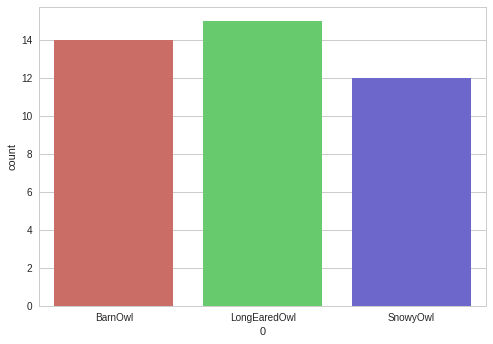

,0,1,2,3
0,,,,
BarnOwl,3.371429,5.028571,1.485714,0.285714
LongEaredOwl,3.393333,4.893333,1.486667,0.206667
SnowyOwl,3.558333,5.091667,1.391667,0.266667


In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

def avgAccuracy():
    sum=0
    for i in range(len(avergAccuracy)):
      sum= sum + avergAccuracy[i]
    print("The average accuracy of the system after the iteration is : ",(sum/10),"%")
avgAccuracy()
print(confusion_matrix(yList, p))

#k = len(np.unique(y))
target_names = np.unique(y)
print(classification_report(yList, p, target_names=target_names))

label = pd.DataFrame(np.asarray(yList))
print(label[0].value_counts())

X_test_df = pd.DataFrame(np.asarray(X_test))

sns.countplot(x = label[0], data = X_test_df, palette = 'hls')
plt.show()

owls.groupby(label[0]).mean()
